In [46]:
#Import libraries
import os
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from sklearn.cross_validation import train_test_split
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from random import randrange, uniform
from sklearn.preprocessing import Normalizer

In [47]:
os.chdir("E:\study\Data\Project#2")

In [48]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [49]:
result=[train,test]
df=pd.concat(result)


In [50]:
df.shape


(5000, 21)

In [51]:
df.dtypes

state                             object
account length                     int64
area code                          int64
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

In [52]:
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [53]:
#converting to cat

In [54]:
lis = []
for i in range(0, df.shape[1]):
    #print(i)
    if(df.iloc[:,i].dtypes == 'object'):
        df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
        #print(marketing_train[[i]])
        df.iloc[:,i] = df.iloc[:,i].cat.codes 
        df.iloc[:,i] = df.iloc[:,i].astype('object')
        
        lis.append(df.columns[i])

In [55]:
for i in range (0,df.shape[1]):
    df.iloc[:,i]= df.iloc[:,i].replace(-1, np.nan)


In [56]:
cnames=["state","international plan","voice mail plan","Churn"]

In [57]:
for i in cnames:
    df.loc[:,i] = df.loc[:,i].round()
    df.loc[:,i] = df.loc[:,i].astype('object')

In [58]:
df=df.drop("phone number",axis=1)

In [59]:
# explotary analysis

In [60]:
df['Churn'] = df['Churn'].replace(0,'No')
df['Churn'] = df['Churn'].replace (1,'Yes')

In [61]:
#outlier analysis

[Text(0,0.5,'total night calls'),
 Text(0.5,0,'Churn'),
 Text(0.5,1,'total night calls')]

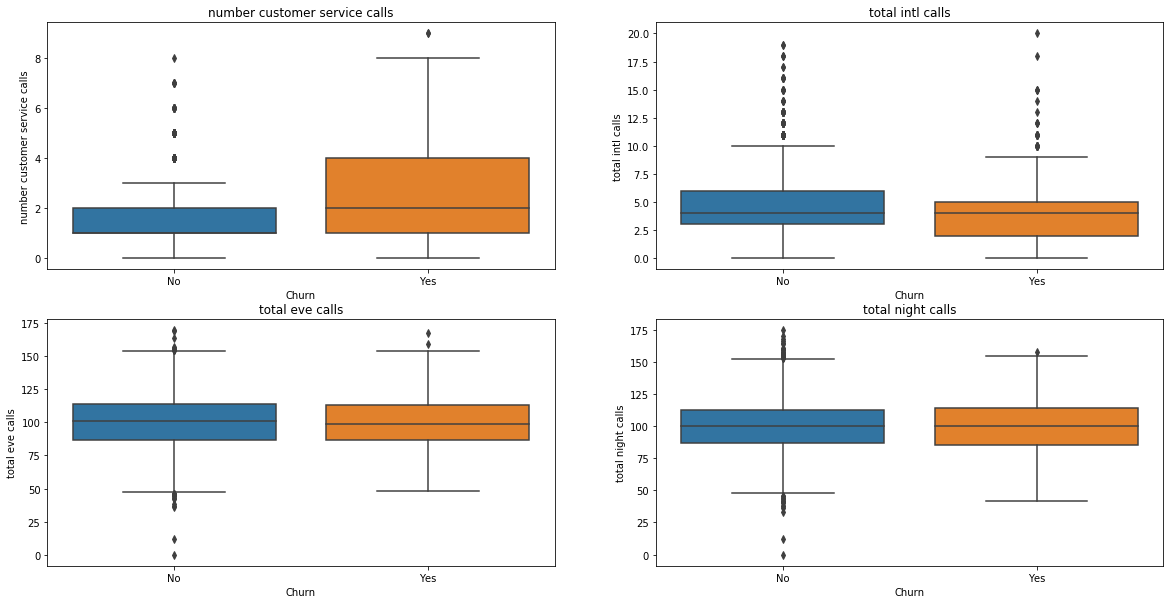

In [62]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)
sn.boxplot(data=df,y="number customer service calls",x="Churn",orient="v",ax=axes[0][0])
sn.boxplot(data=df,y="total intl calls",x="Churn",orient="v",ax=axes[0][1])
sn.boxplot(data=df,y="total eve calls",x="Churn",orient="v",ax=axes[1][0])
sn.boxplot(data=df,y="total night calls",x="Churn",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='number customer service calls',xlabel= "Churn",title="number customer service calls")
axes[0][1].set(ylabel='total intl calls',xlabel= "Churn",title="total intl calls")

axes[1][0].set(ylabel='total eve calls',xlabel= "Churn",title="total eve calls")
axes[1][1].set(ylabel='total night calls',xlabel= "Churn",title="total night calls")

[Text(0,0.5,'total intl charge'),
 Text(0.5,0,'Churn'),
 Text(0.5,1,'total intl charges')]

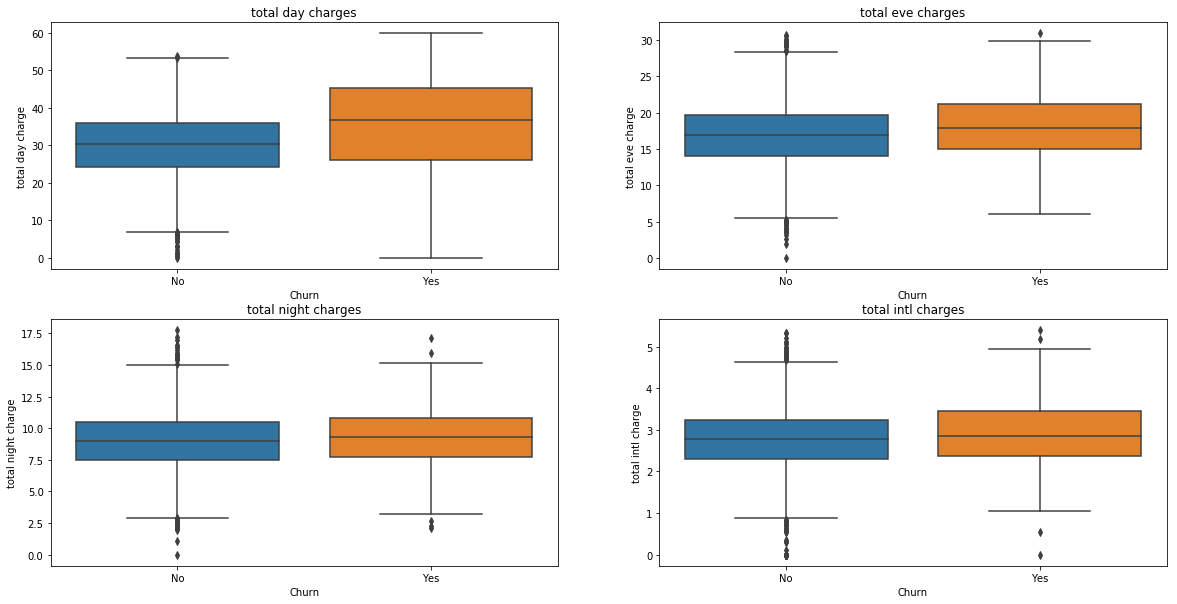

In [63]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)
sn.boxplot(data=df,y="total day charge",x="Churn",orient="v",ax=axes[0][0])
sn.boxplot(data=df,y="total eve charge",x="Churn",orient="v",ax=axes[0][1])
sn.boxplot(data=df,y="total night charge",x="Churn",orient="v",ax=axes[1][0])
sn.boxplot(data=df,y="total intl charge",x="Churn",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='total day charge',xlabel= "Churn",title="total day charges")
axes[0][1].set(ylabel='total eve charge',xlabel= "Churn",title="total eve charges")

axes[1][0].set(ylabel='total night charge',xlabel= "Churn",title="total night charges")
axes[1][1].set(ylabel='total intl charge',xlabel= "Churn",title="total intl charges")

In [64]:
cnames=["total intl minutes","total intl calls","total intl charge","number vmail messages","total day minutes","total day calls","total day charge",
"total eve minutes","total eve calls","total eve charge","total night minutes","total night calls","total night charge"]


In [65]:
##Correlation analysis
#Correlation plot
df_corr = df.loc[:,cnames]

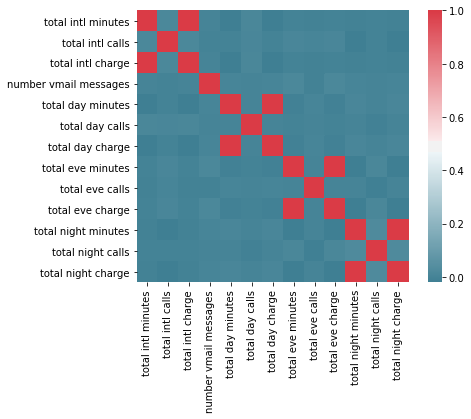

In [66]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
import seaborn as sns
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#Model Development


In [67]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [68]:
#Changing factors to catagorical variables
lis = []
for i in range(0, train.shape[1]):
    #print(i)
    if(train.iloc[:,i].dtypes == 'object'):
        train.iloc[:,i] = pd.Categorical(train.iloc[:,i])
        #print(marketing_train[[i]])
        train.iloc[:,i] = train.iloc[:,i].cat.codes 
        train.iloc[:,i] = train.iloc[:,i].astype('object')
        
        lis.append(train.columns[i])

In [69]:
for i in range (0,train.shape[1]):
    train.iloc[:,i]= train.iloc[:,i].replace(-1, np.nan)


In [70]:
cnames=["state","international plan","voice mail plan","Churn"]

In [71]:
for i in cnames:
    train.loc[:,i] = train.loc[:,i].round()
    train.loc[:,i] = train.loc[:,i].astype('object')

In [72]:
lis = []
for i in range(0, test.shape[1]):
    #print(i)
    if(test.iloc[:,i].dtypes == 'object'):
        test.iloc[:,i] = pd.Categorical(test.iloc[:,i])
        #print(marketing_train[[i]])
        test.iloc[:,i] = test.iloc[:,i].cat.codes 
        test.iloc[:,i] = test.iloc[:,i].astype('object')
        
        lis.append(test.columns[i])

In [73]:
for i in range (0,test.shape[1]):
    test.iloc[:,i]= test.iloc[:,i].replace(-1, np.nan)


In [74]:
cnames=["state","international plan","voice mail plan","Churn"]

In [75]:
for i in cnames:
    test.loc[:,i] = test.loc[:,i].round()
    test.loc[:,i] = test.loc[:,i].astype('object')

In [76]:
# analysis by feature selection shows below variables to not have any importance to the target variable so we are removing them 
test=test.drop("phone number",axis=1)
test=test.drop("state",axis=1)
test=test.drop("account length",axis=1)
train=train.drop("phone number",axis=1)
train=train.drop("state",axis=1)
train=train.drop("account length",axis=1)

In [77]:
train.head(5)

,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [78]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

In [79]:
#replace target categories with Yes or No
train['Churn'] = train['Churn'].replace(0,'No')
train['Churn'] = train['Churn'].replace (1,'Yes')

In [80]:
test['Churn'] = test['Churn'].replace(0,'No')
test['Churn'] = test['Churn'].replace (1,'Yes')

In [81]:
yLabels=train["Churn"]
#train2=train
train=train.drop("Churn",axis=1)

In [82]:
xLabels=test["Churn"]
#test2=test
test=test.drop("Churn",axis=1)

In [83]:
#Decision Tree

In [84]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(train,yLabels)

#predict new test cases
C50_Predictions = C50_model.predict(test)


In [85]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
CM = pd.crosstab(xLabels, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Results
#Accuracy:92.68
#FNR: 30.80%

29.910714285714285

In [86]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(train,yLabels)

In [87]:
RF_Predictions = RF_model.predict(test)

In [88]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(xLabels, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
    
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Accuracy: 95.6%
#FNR: 29.01%

29.017857142857142

In [89]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(train, yLabels)

In [90]:
#predict test cases
NB_Predictions = NB_model.predict(test)

In [91]:
#Build confusion matrix
CM = pd.crosstab(xLabels, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Accuracy: 87.52%
#FNR: 46.87%

46.875